## Gather

In [2]:
import pandas as pd
import numpy as np
import json
import requests
import tweepy
import time
import re
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
twitter_arc = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
file_url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(file_url)
with open('image_predictions.tsv',mode='wb') as file:
              file.write(response.content)
images= pd.read_csv('image_predictions.tsv',sep='\t')

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit =True ,wait_on_rate_limit_notify =True)

In [15]:
appended_list=[]# list for existing tweets
not_appended_list=[]#list for deleted tweets
start = time.time()#start time
for ID in twitter_arc['tweet_id']:
    try:# try to append tweets into list
        tweet= api.get_status(id=ID,tweet_mode='extended')._json# converting the content to json file
        tweet_id= tweet['id']
        retweet_count= tweet['retweet_count']
        favorite_count= tweet['favorite_count']
        info_dict= {'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': favorite_count}
        appended_list.append(info_dict)
    except:# in case we fail to get the tweet
        not_appended_list.append(ID)
        print(ID)

end = time.time()#end of the time
print(end - start)# time needed in seconds

888202515573088257
873697596434513921
872668790621863937
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
802247111496568832
775096608509886464
770743923962707968
754011816964026368


Rate limit reached. Sleeping for: 149


2124.689076423645


In [16]:
tweet_data = pd.DataFrame(appended_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [17]:
tweet_data.to_csv('tweet_json.txt',encoding='utf-8', index= False)

In [3]:
tweet_data = pd.read_csv('tweet_json.txt',encoding='utf-8')

In [4]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8376,38239
1,892177421306343426,6184,32783
2,891815181378084864,4092,24687
3,891689557279858688,8517,41568
4,891327558926688256,9222,39746


## Assess

In [427]:
twitter_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [428]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [429]:
print(twitter_arc.doggo.value_counts()),print(twitter_arc.floofer.value_counts()),print(twitter_arc.pupper.value_counts()),print(twitter_arc.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


(None, None, None, None)

In [430]:
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [431]:
twitter_arc.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
Daisy         7
an            7
Buddy         7
Bailey        7
Milo          6
Oscar         6
Leo           6
Dave          6
Koda          6
Stanley       6
Rusty         6
Bella         6
Jax           6
Jack          6
Scout         6
very          5
           ... 
Sora          1
Anthony       1
Kevon         1
Bayley        1
Gert          1
Lilah         1
Crawford      1
Dale          1
Deacon        1
Taco          1
DayZ          1
Lambeau       1
Todo          1
Jennifur      1
Roscoe        1
Ben           1
Tyrus         1
Spark         1
Lenox         1
Tango         1
Jazzy         1
Leonard       1
Dunkin        1
Claude        1
Sunshine      1
Napolean      1
Bobb          1
Godi          1
Timofy        1
Stu           1
Name: name, Length: 957,

In [432]:
twitter_arc[twitter_arc.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [433]:
twitter_arc.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [434]:
twitter_arc[twitter_arc.rating_denominator== 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [435]:
for index, row in twitter_arc.iterrows():#display the text of  ratings denominator other than 10
    if row.rating_denominator!= 10:
        print(row.text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #Fin

In [436]:
twitter_arc.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [437]:
for index, row in twitter_arc.iterrows():#display the text of  ratings numerator less than 7 and greater than 14
    if row.rating_numerator<7 or 14< row.rating_numerator:
        print(row.text)

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
@markhoppus 182/10
@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPk

In [438]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [439]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [440]:
sum(images.duplicated())

0

In [441]:
sum(images.jpg_url.duplicated())# geting the number of url duplicates

66

In [442]:
images.p1.value_counts(ascending= False)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [443]:
images.p2.value_counts(ascending= False)

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Eskimo_dog                         27
collie                             27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
miniature_pinscher                 20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [20]:
tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8376,38239
1,892177421306343426,6184,32783
2,891815181378084864,4092,24687
3,891689557279858688,8517,41568
4,891327558926688256,9222,39746
5,891087950875897856,3070,19951
6,890971913173991426,2035,11675
7,890729181411237888,18596,64541
8,890609185150312448,4208,27421
9,890240255349198849,7277,31468


In [21]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


#### Quality
##### `twitter_arc` table
- None instead of null: in some variables "None" is used instead of the type Nan.
- worng data types
- Some valuse are with no expanded_Urls
- only original tweets no retweets.Also, delete retweets related columns.
- Wrong names: Names like None, a, an, the and very.
- Bad source values.
- Unwanted links in the text column.
- Some bad ratings
##### `images` table
- some repeated urls.
- The number of columns is less than the `twitter_arc` table
- bad columns naming.
##### `tweet_data` table
- some tweets are deleted.

#### Tidiness
- tabels shall be joined in two tables.
- some columns in twitter_arc represent one variable

## Clean

In [446]:
#making copies from the dataframes
twitter_arc_clean = twitter_arc.copy()
images_clean = images.copy()
tweet_data_clean= tweet_data.copy()

#### Some valuse are with no expanded_Urls:

 ##### Define: 
First I will check if there is any related data in the `images_clean` dataframe, then I will drop the rows.

##### code:

In [447]:
#checking for values with no expanded urls in the images_clean dataframe
count=0
for index, row in twitter_arc_clean.iterrows():
    if pd.isnull(row.expanded_urls):
        if row['tweet_id'] in images_clean.tweet_id.values:
            print(row['tweet_id'])
            count+=1
print(count)

0


In [448]:
twitter_arc_clean.dropna(axis= 0,subset=['expanded_urls'], inplace= True)#dropping the null expanded_urls
twitter_arc_clean = twitter_arc_clean.reset_index(drop=True)#resting the index after deleting

##### test:

In [449]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2297 entries, 0 to 2296
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### only original tweets no retweets:

##### Define:
drop the rows with retweets from both `twitter_arc_clean` and `images_clean`. 

##### code:

In [450]:
# finding and deleting retweets from both dataframes
count=0
to_drop_indexs=[]# contain the idndexes that will be deleted from the image_clean dataframe 
for index, row in twitter_arc_clean.iterrows():
    if not np.isnan(row.retweeted_status_id):
        if row['tweet_id'] in images_clean.tweet_id.values:
            count+=1
            to_drop_indexs.append(images_clean.index[images_clean.tweet_id == row['tweet_id']][0])
images_clean.drop(to_drop_indexs,inplace= True)
twitter_arc_clean.drop(twitter_arc_clean.index[pd.notnull(twitter_arc_clean.retweeted_status_id)].tolist(),
                            inplace= True)
images_clean = images_clean.reset_index(drop=True)
twitter_arc_clean = twitter_arc_clean.reset_index(drop=True)

In [453]:
#dropin the unwanted columns
twitter_arc_clean.drop(columns= ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                            inplace= True)

##### test:

In [451]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

In [452]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id    1994 non-null int64
jpg_url     1994 non-null object
img_num     1994 non-null int64
p1          1994 non-null object
p1_conf     1994 non-null float64
p1_dog      1994 non-null bool
p2          1994 non-null object
p2_conf     1994 non-null float64
p2_dog      1994 non-null bool
p3          1994 non-null object
p3_conf     1994 non-null float64
p3_dog      1994 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 146.1+ KB


In [455]:
#checking jpg_url duplicates after deleting the retweeted tweets
images_clean.jpg_url.value_counts()

https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg                                            1
https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg                                            1
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                                            1
https://pbs.twimg.com/media/CV1ffl3XAAAiFyr.jpg                                            1
https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg                                            1
https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg                                            1
https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg                                            1
https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg                                            1
https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg                                            1
https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg                                            1
https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg                       

### worng data types

#### Wrong names: Names like None, a, an, the and very.

##### Define:
we will use regular expritions to find the names depending on their context: Here we have, Here is, name is and named. Then assign None to the rows with no names

##### Code:

In [456]:
wrong_names= ("None","a","an","the","very")# tuple of the wrong appended names
# regular exprission to get the context the name may accure in 
reg_exp= 'Here we have [A-Z]\w+|Here is [A-Z]\w+ |name is [A-Z]\w+|named [A-Z]\w+'
count= 0
for index, row in twitter_arc_clean.iterrows():
    if row['name'] in wrong_names:
        name_context= re.findall(reg_exp,row['text'])
        if name_context:
            twitter_arc_clean['name'][index]= name_context[0].split()[-1] # getting the last string because it is the name  

C:\Users\abdll\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [457]:
twitter_arc_clean.name.replace(['None','a','an','the','very'],np.nan,inplace=True)#repalcing the wrong names with null 

##### Test:

In [458]:
twitter_arc_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Bailey        6
Stanley       6
Koda          6
Bo            6
Oscar         6
Bella         6
Jax           6
Scout         5
Buddy         5
Louis         5
Rusty         5
Leo           5
Chester       5
Dave          5
Bentley       5
Milo          5
Reggie        4
Duke          4
Larry         4
             ..
Stephanus     1
Maude         1
Olaf          1
Sunshine      1
Claude        1
Dunkin        1
DayZ          1
Lassie        1
Cilantro      1
Alfy          1
Ozzie         1
Alejandro     1
Grizzie       1
Emanuel       1
Patch         1
Quinn         1
Taco          1
Lambeau       1
Leonard       1
Kip           1
Todo          1
Jennifur      1
Roscoe        1
Ben           1
Bayley        1
Spark         1
Carbon        1
Lenox         1
Jazzy         1
Stu           1
Name: name, Length: 977,

#### Some bad ratings

##### Define:
Extract the correct ratings from the text, then change the columns types int float. Also, drop columns with no ratings from both `twitter_arc_clean` and `images_clean`.

##### Code:

In [459]:
c=0
numerators=[]# to store rating numerators
denominator=[]# to store rating denominator
for index, row in twitter_arc_clean.iterrows():
    ratings = re.findall('-?\d+\.?\d*/-?\d+\.?\d*',row.text)
    if len(ratings)== 1:
        z= ratings[0].split("/")
        #
        numerators.append(z[0])
        denominator.append(z[1])
    elif len(ratings)>1:
        numerators.append(np.nan)
        denominator.append(np.nan)
        print(row['text'])#printing the row to get the correct ratings
        print(ratings)
        c+=1
        
print(c)
twitter_arc_clean.rating_denominator= denominator
twitter_arc_clean.rating_numerator= numerators

590
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
['12/10', '11/10']
799
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
['10/10', '7/10']
857
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
['9/11', '14/10.']
953
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
['4/20', '13/10']
990
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
['50/50.', '11/10']
1010
Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
['10/10', '8/10']
1144
This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
['9/10', '

In [460]:
ratings=[(23,20),(17,20),(14,10),(13,10),(11,10),(18,20),(9,10),(4,10),(10,10),(15,20),(10,10),(21,20),
         (10,10),(21,20),(10,10),(10,10),(8,10),(8,10),(10,10),(11,10),(19,20),(17,20),(8,10),(10,10),(8,10),(20,20),(9,10)]

In [461]:
twitter_arc_clean.loc[twitter_arc_clean['rating_numerator'].isnull(), 'rating_numerator']= [x[0] for x in ratings]
twitter_arc_clean.loc[twitter_arc_clean['rating_denominator'].isnull(), 'rating_denominator']= [x[1] for x in ratings]

In [462]:
twitter_arc_clean.rating_numerator=twitter_arc_clean.rating_numerator.astype(float)
twitter_arc_clean.rating_denominator=twitter_arc_clean.rating_denominator.astype(float)

In [463]:
twitter_arc_clean.loc[twitter_arc_clean.rating_denominator==7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
405,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None


In [464]:
images_clean.loc[images_clean.tweet_id== 810984652412424192]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1608,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [465]:
twitter_arc_clean.drop(405,0, inplace= True)
images_clean.drop(1608,0, inplace= True)
images_clean = images_clean.reset_index(drop=True)
twitter_arc_clean = twitter_arc_clean.reset_index(drop=True)

##### Test:

In [466]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 14 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null object
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1452 non-null object
doggo                    2116 non-null object
floofer                  2116 non-null object
pupper                   2116 non-null object
puppo                    2116 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 231.5+ KB


In [467]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 12 columns):
tweet_id    1993 non-null int64
jpg_url     1993 non-null object
img_num     1993 non-null int64
p1          1993 non-null object
p1_conf     1993 non-null float64
p1_dog      1993 non-null bool
p2          1993 non-null object
p2_conf     1993 non-null float64
p2_dog      1993 non-null bool
p3          1993 non-null object
p3_conf     1993 non-null float64
p3_dog      1993 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 146.0+ KB


In [468]:
twitter_arc_clean.rating_denominator.value_counts()

10.0     2095
20.0        9
50.0        2
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

In [469]:
twitter_arc_clean.rating_numerator.value_counts()

12.00      488
10.00      432
11.00      416
13.00      296
9.00       154
8.00       100
7.00        50
14.00       41
6.00        32
5.00        31
3.00        19
4.00        15
2.00         9
1.00         4
0.00         2
21.00        2
17.00        2
18.00        1
23.00        1
84.00        1
13.50        1
143.00       1
80.00        1
420.00       1
1776.00      1
165.00       1
45.00        1
204.00       1
99.00        1
9.75         1
121.00       1
11.27        1
11.26        1
20.00        1
19.00        1
88.00        1
144.00       1
15.00        1
44.00        1
60.00        1
Name: rating_numerator, dtype: int64

#### `twitter_arc:`worng data types.

##### Define:
(timestamp, retweeted_status_timestamp) are of type **string** and shall be converted to **datetime** object . Also, (retweeted_status_id, retweeted_status_user_id in_reply_to_status_id, in_reply_to_user_id ) are **Float** type and should be **str**.

##### Code:

In [470]:
twitter_arc_clean.timestamp= pd.to_datetime(twitter_arc_clean.timestamp)
twitter_arc_clean.in_reply_to_status_id= twitter_arc_clean.in_reply_to_status_id.astype(str)
twitter_arc_clean.in_reply_to_user_id= twitter_arc_clean.in_reply_to_user_id.astype(str)

In [471]:
twitter_arc_clean['in_reply_to_status_id'].replace("nan",np.nan,inplace= True)
twitter_arc_clean['in_reply_to_user_id'].replace("nan",np.nan,inplace= True)

##### Test:

In [472]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 14 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1452 non-null object
doggo                    2116 non-null object
floofer                  2116 non-null object
pupper                   2116 non-null object
puppo                    2116 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 231.5+ KB


In [473]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


#### `twitter_arc:` None instead of null

##### Define:
replace **'None'** with **np.nan** for the whole dataset

##### Code:

In [474]:
twitter_arc_clean.replace('None', np.nan, inplace= True)

##### Test:

In [475]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN


In [476]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 14 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1452 non-null object
doggo                    84 non-null object
floofer                  10 non-null object
pupper                   232 non-null object
puppo                    24 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 231.5+ KB


### Bad source values

##### Define:
Get the source name from the html tag.

##### Code:

In [477]:
#dictionary to map the source values into the correct ones
source_dict= {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
        '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
        '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
        '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}
def get_source(df):
    re = source_dict[df['source']]
    return re
twitter_arc_clean['source']= twitter_arc_clean.apply(get_source, axis=1)

##### Test:

In [478]:
twitter_arc_clean.source.value_counts()

Twitter for iPhone     1984
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [479]:
twitter_arc_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN


#### Unwanted links in the text column

##### Define: 
extract and remove the links from the column.

##### Code:

In [480]:
twitter_arc_clean.text= twitter_arc_clean.text.str.replace("(?P<url>https?://[^\s]+)",'')# repalcing the url with empty sring

##### Test:

In [481]:
for x in range(0,7):#printing the full text to make sure the urls were deleted correctly
    print(twitter_arc_clean.text[x])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

 


#### Bad columns names:

##### Define:
map the wrong names into new correct names.

##### Code:

In [482]:
images_clean.rename(columns= {'jpg_url':'image_url','img_num':'number_of_images','p1':'prediction_1','p1_conf':'p1_confidence',
                              'p1_dog':'prediction_1_dog','p2':'prediction_2','p2_conf':'p2_confidence','p2_dog':'prediction_2_dog',
                              'p3':'prediction_3','p3_conf':'p3_confidence','p3_dog':'prediction_3_dog'}, inplace= True)

##### Test:

In [483]:
images_clean.head()

,tweet_id,image_url,number_of_images,prediction_1,p1_confidence,prediction_1_dog,prediction_2,p2_confidence,prediction_2_dog,prediction_3,p3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness

#### some columns in twitter_arc represent one variable

##### Define:
Melt **doggo**, **floofer**, **pupper**, **puppo** into one column called  **stage**

##### Code:

In [484]:
twitter_arc_clean['dog_stage'] = twitter_arc_clean['text'].str.extract('(puppo|pupper|floofer|doggo)')#getting the dog stage from the text
twitter_arc_clean.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)#droping the columns

##### Test:

In [485]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 11 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null float64
rating_denominator       2116 non-null float64
name                     1452 non-null object
dog_stage                356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 181.9+ KB


In [486]:
twitter_arc_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo


#### tabels shall be joined in one table.

##### Define:
Merge the appropriate columns from all the data sets to create two data frames `dogs_img_master` and `twitter_archive_master`

##### Code:

In [487]:
dog_info= twitter_arc_clean[['tweet_id','name','dog_stage','rating_numerator','rating_denominator']]

In [488]:
dogs_img_master= pd.merge(images_clean, dog_info, on="tweet_id", how='left')
twitter_archive_master= pd.merge(twitter_arc_clean, tweet_data_clean, on="tweet_id", how='left')

In [489]:
twitter_archive_master.drop(columns= ['name','dog_stage','rating_numerator','rating_denominator'],inplace= True)

##### Test:

In [490]:
list(twitter_archive_master)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'favorite_count',
 'retweet_count']

In [491]:
list(dogs_img_master)

['tweet_id',
 'image_url',
 'number_of_images',
 'prediction_1',
 'p1_confidence',
 'prediction_1_dog',
 'prediction_2',
 'p2_confidence',
 'prediction_2_dog',
 'prediction_3',
 'p3_confidence',
 'prediction_3_dog',
 'name',
 'dog_stage',
 'rating_numerator',
 'rating_denominator']

In [492]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 9 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
favorite_count           2115 non-null float64
retweet_count            2115 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 165.3+ KB


In [493]:
dogs_img_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 16 columns):
tweet_id              1993 non-null int64
image_url             1993 non-null object
number_of_images      1993 non-null int64
prediction_1          1993 non-null object
p1_confidence         1993 non-null float64
prediction_1_dog      1993 non-null bool
prediction_2          1993 non-null object
p2_confidence         1993 non-null float64
prediction_2_dog      1993 non-null bool
prediction_3          1993 non-null object
p3_confidence         1993 non-null float64
prediction_3_dog      1993 non-null bool
name                  1405 non-null object
dog_stage             326 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
dtypes: bool(3), float64(5), int64(2), object(6)
memory usage: 223.8+ KB


In [494]:
twitter_archive_master.to_csv("twitter_archive_master.csv",index= False)

In [495]:
dogs_img_master.to_csv("dogs_img_master.csv",index= False)

## Analysis:

In [496]:
tweets_dogs= pd.merge(twitter_archive_master, dogs_img_master, on="tweet_id", how='left')

In [517]:
tweets_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2115
Data columns (total 26 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2116 non-null datetime64[ns]
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
favorite_count           2115 non-null float64
retweet_count            2115 non-null float64
image_url                1993 non-null object
number_of_images         1993 non-null float64
prediction_1             1993 non-null object
p1_confidence            1993 non-null float64
prediction_1_dog         1993 non-null object
prediction_2             1993 non-null object
p2_confidence            1993 non-null float64
prediction_2_dog         1993 non-null object
prediction_3             1993 non-null object
p3_confidence            1993 non-null float64
prediction

In [498]:
def draw_barchart(bars_list,bars_hight,width,color,title= None,x_lable= None, y_lable=None):
    """this function takes bars_list,bars_hight,width,color, title, x_lable and y_lable
    as parameters graphs a bar chart for the given list
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.bar(bars_list, bars_hight, width, color= color, label='Red Wine')
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    
def plot_pie(fracs,labels,colors,title):
    plt.pie(fracs,labels=labels,colors= colors)
    plt.title(title)

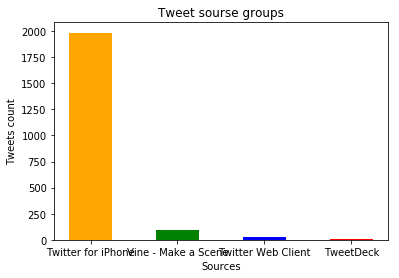

In [499]:
sources= tweets_dogs['source'].value_counts().index.tolist()
source_hight= tweets_dogs['source'].value_counts()
colors= ('orange','green','blue','red')
title= 'Tweet sourse groups'
x_lable= 'Sources'
y_lable= 'Tweets count'
draw_barchart(sources, source_hight,0.5,colores,title,x_lable,y_lable)

In [534]:
tweets_dogs['source'].value_counts()

Twitter for iPhone     1984
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [501]:
tweets_dogs['day_of_week']= tweets_dogs.timestamp.dt.day_name()

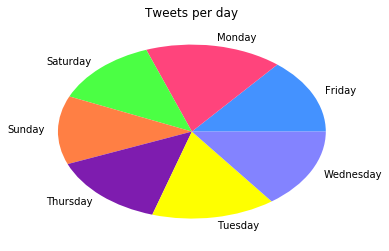

In [510]:
days= tweets_dogs.groupby('day_of_week')['tweet_id'].count().index.tolist()
count_per_day= tweets_dogs.groupby('day_of_week')['tweet_id'].count()
colors= ('#4492ff','#ff447c','#4bff44','#ff7f44','#7e1caf','#FEFF00','#8383ff')
title= 'Tweets per day'
plot_pie(count_per_day,days,colors,title)

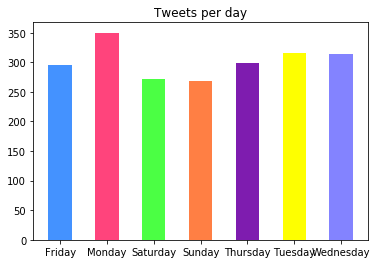

In [512]:
title= 'Tweets per day'
draw_barchart(days,count_per_day,0.5,colors, title, '','')

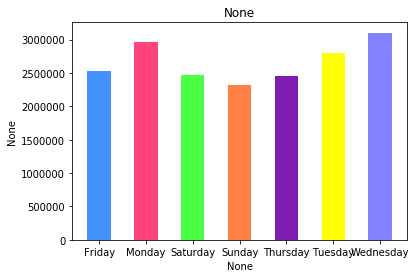

In [504]:
days= tweets_dogs.groupby('day_of_week')['tweet_id'].sum().index.tolist()
favorite_sum= tweets_dogs.groupby('day_of_week')['favorite_count'].sum()
draw_barchart(days,favorite_sum,0.5,colors,)

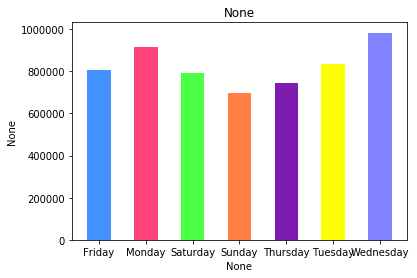

In [505]:
s= tweets_dogs.groupby('day_of_week')['retweet_count'].sum()
draw_barchart(days,s,0.5,colors)

In [506]:
days= tweets_dogs.groupby('dog_stage')['tweet_id'].count().index.tolist()
tweets_dogs.groupby('dog_stage')['tweet_id'].count()


dog_stage
doggo       72
floofer      3
pupper     223
puppo       28
Name: tweet_id, dtype: int64

In [507]:
tweets_dogs['year']= tweets_dogs.timestamp.dt.year

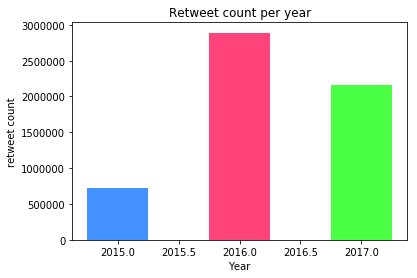

In [514]:
years= tweets_dogs.groupby('year')['tweet_id'].count().index.tolist()
retweet_count= tweets_dogs.groupby('year')['retweet_count'].sum()
draw_barchart(years,retweet_count,0.5,colors,'Retweet count per year','Year','retweet count')

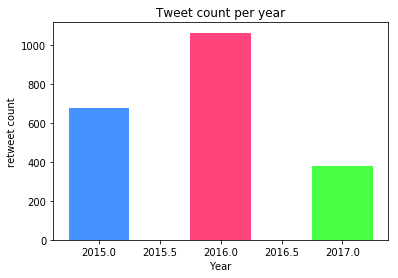

In [543]:
years= tweets_dogs.groupby('year')['tweet_id'].count().index.tolist()
tweet_count= tweets_dogs.groupby('year')['tweet_id'].count()
draw_barchart(years,tweet_count,0.5,colors,'Tweet count per year','Year','retweet count')

In [547]:
tweets_dogs.groupby('year')['retweet_count'].sum()/tweets_dogs.groupby('year')['tweet_id'].count()

year
2015    1076.489645
2016    2718.820320
2017    5716.535809
dtype: float64

In [538]:
print(tweets_dogs[tweets_dogs['rating_numerator']==1776.0]['expanded_urls'].values)
print(tweets_dogs[tweets_dogs['rating_numerator']==420]['expanded_urls'].values)

['https://twitter.com/dog_rates/status/749981277374128128/photo/1']
['https://twitter.com/dog_rates/status/670842764863651840/photo/1']


In [533]:
print(tweets_dogs[tweets_dogs['favorite_count']==tweets_dogs['favorite_count'].max()]['expanded_urls'].values)

['https://twitter.com/dog_rates/status/744234799360020481/video/1']


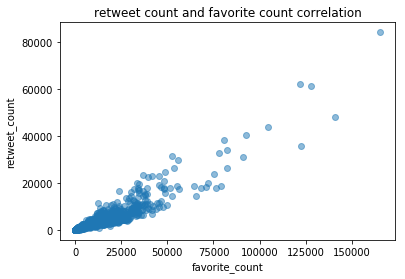

In [549]:
plt.scatter(tweets_dogs.favorite_count,tweets_dogs.retweet_count,alpha=0.5);
plt.title('retweet count and favorite count correlation')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count');

In [524]:
tweets_dogs.favorite_count.corr(tweets_dogs.retweet_count)

0.92734168817538